#### Step 1: To identify the problem: 
           a. Based on human intervention - Supervised / Unsupervised / Semi-supervised / Reinforcemnet learning
           b. Capability to learn on the fly - Batch(offline) / Online
           c. Generalisation - instance based / model based
           d. Regression / Classification problem
           e. Univariate / Multivariate
           
#### Step 2: Choose performance measures accordingly
           - Regression - RMSE(l2,eucladian,sentitive to outliers) / MAE(l1,manhattan,best outliers present)
           - Classification - 

HOUSING DATA : Predict the median housing prices in any desctrict given all the other metrics

What we chose? 
- Supervised
- Offline
- Model based
- Regression
- Univariate
- RMSE

#### Step 3: Bring in the Data 

In [1]:
import numpy as np 
import pandas as pd
housing=pd.read_csv("Housing.csv")

## Data sufficiency?

In [2]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb8bb4aeb8>,
      dtype=object)

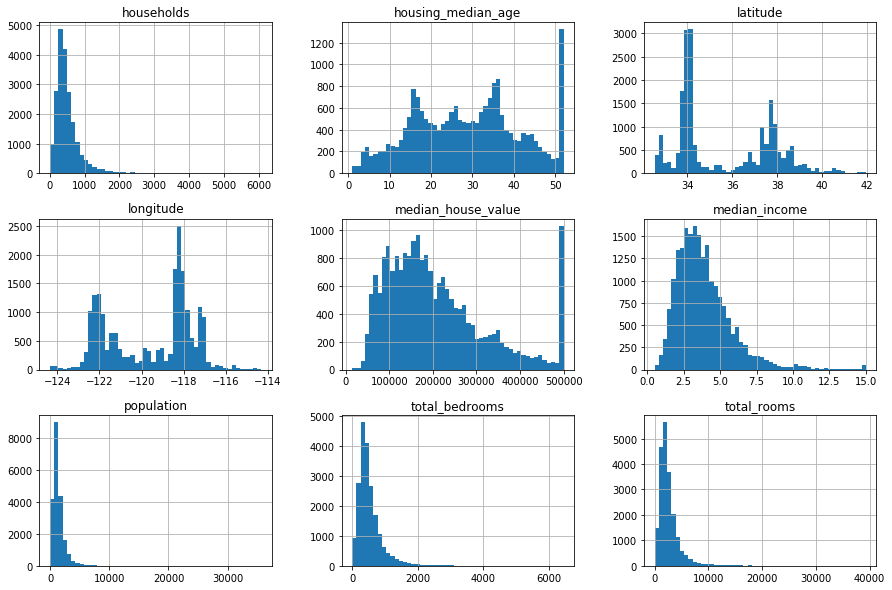

In [6]:
import matplotlib as plt
%matplotlib inline
housing.hist(bins=50, figsize= (15,10))

1. Data caping
2. Heavy on tails
3. Different scales

## Data respresentive/non-representative of population?

In [7]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [8]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [9]:
# stratified sampling to ensure test set is representative

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train = housing.loc[train_index]
    strat_test = housing.loc[test_index]

In [11]:
for set_ in (strat_train, strat_test):
    set_.drop("income_cat", axis=1, inplace=True)

In [12]:
strat_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


## Data - Features and relevancy

1. Feature

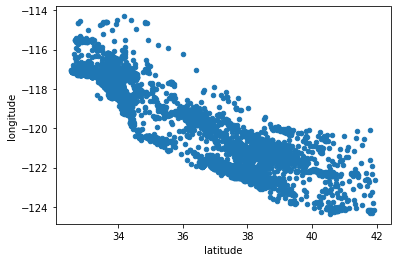

In [13]:
strat_train.plot(kind = 'scatter', x = 'latitude', y = 'longitude')

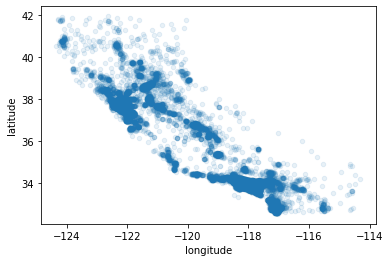

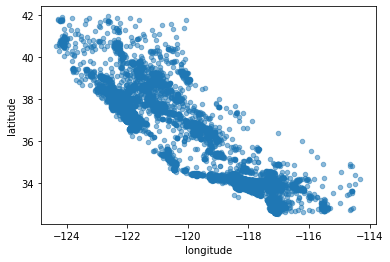

In [14]:
strat_train.plot(kind="scatter", x="longitude", y ="latitude", alpha = 0.1)
strat_train.plot(kind="scatter", x="longitude", y ="latitude", alpha = 0.5)

alpa parameter : ranges from 0 to 1 - helps identify highly dense areas in the scatter plot

2. Correlations

In [15]:
corr_matrix = strat_train.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [16]:
# with my target?
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

Corr/Pearsons coef ranges from -1 to 1
    - -1 strong negative corr
    - 0 no correlation
    - 1 strong positive corr

#### Corr coeff measures only linear relationships. Any high degree polynomial will have corr = 0 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb8ebe41d0>,
      dtype=object)

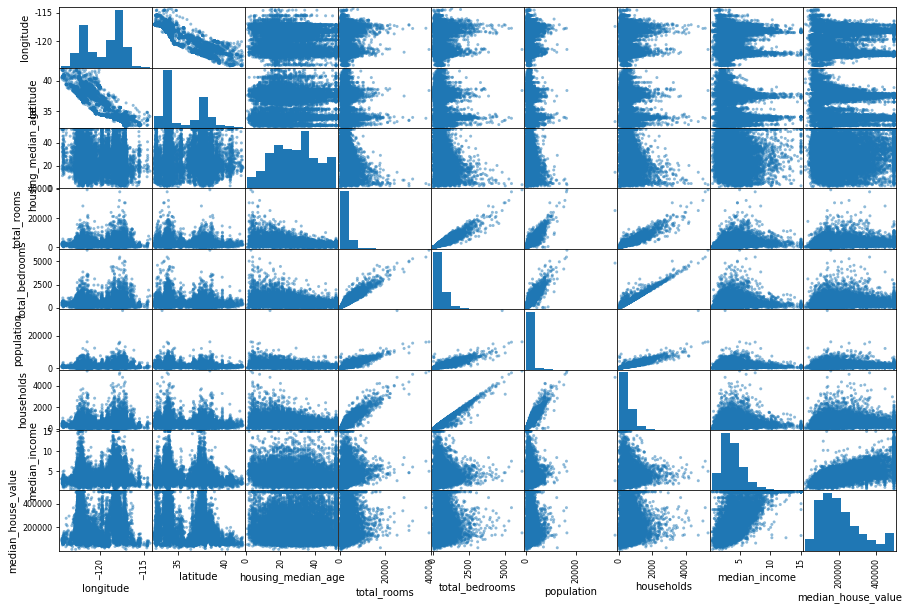

In [17]:
from pandas.plotting import scatter_matrix
%matplotlib inline
scatter_matrix(strat_train, figsize = (15,10))

3. Feature engineering

In [18]:
strat_train["rooms_per_household"] = strat_train["total_rooms"]/strat_train["households"]
strat_train["bedrooms_per_room"] = strat_train["total_bedrooms"]/strat_train["total_rooms"]
strat_train["population_per_household"]=strat_train["population"]/strat_train["households"]

corr_matrix = strat_train.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## Quality of Data

Seperate predictors and labels

In [19]:
housing = strat_train.drop("median_house_value", axis = 1)
housing_labels = strat_train.median_house_value.copy()
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 12 columns):
longitude                   16512 non-null float64
latitude                    16512 non-null float64
housing_median_age          16512 non-null float64
total_rooms                 16512 non-null float64
total_bedrooms              16354 non-null float64
population                  16512 non-null float64
households                  16512 non-null float64
median_income               16512 non-null float64
ocean_proximity             16512 non-null object
rooms_per_household         16512 non-null float64
bedrooms_per_room           16354 non-null float64
population_per_household    16512 non-null float64
dtypes: float64(11), object(1)
memory usage: 1.6+ MB


1. Missing data

In [20]:
housing.dropna(subset = ['total_bedrooms'])

housing.drop("total_bedrooms", axis = 1)

median = housing.total_bedrooms.median()
housing["total_bedrooms"].fillna(median, inplace = True)

In [21]:
# Simple Imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

housing_num = housing.drop("ocean_proximity", axis=1)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

imputer.fit(housing_num)
print(imputer.statistics_)
X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

[-1.18510000e+02  3.42600000e+01  2.90000000e+01  2.11950000e+03
  4.33000000e+02  1.16400000e+03  4.08000000e+02  3.54090000e+00
  5.23228423e+00  2.03031374e-01  2.81765270e+00]


In [22]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 11 columns):
longitude                   16512 non-null float64
latitude                    16512 non-null float64
housing_median_age          16512 non-null float64
total_rooms                 16512 non-null float64
total_bedrooms              16512 non-null float64
population                  16512 non-null float64
households                  16512 non-null float64
median_income               16512 non-null float64
rooms_per_household         16512 non-null float64
bedrooms_per_room           16512 non-null float64
population_per_household    16512 non-null float64
dtypes: float64(11)
memory usage: 1.5 MB


2. Handling categorical data 

In [23]:
ocean_prox = strat_train[["ocean_proximity"]]

#from sklearn.preprcoessing import OrdinalEncoder
#housing_cat=OrdinalEncoder().fit_transform(ocean_proximity)

from sklearn.preprocessing import OneHotEncoder
housing_cat=OneHotEncoder().fit_transform(ocean_prox)
housing_cat

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [24]:
housing_cat.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [25]:
from sklearn.preprocessing import OneHotEncoder
housing_cat=OneHotEncoder(sparse=False).fit_transform(ocean_prox)
housing_cat

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

3. Scaling
    - Min Max scaling or Normalisation : rescales the values between 0 and 1
        (value-min)/(max-min)
    - Standard Scaling : the resulting distribution has 0 mean and unit variance
        (value-mean)/std deviation
    
     **** Some algorithms require the input to be scaled between 0 and 1 like the neural networks(disadvantage) but Std Scaler is less affected by outliers

In [26]:
#from sklearn.preprocessing import MinMaxScaler
# = MinMaxScaler.fit_transform(housing_tr)

from sklearn.preprocessing import StandardScaler
housing_num_tr = StandardScaler().fit_transform(housing_tr)

In [27]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
         0.19380531, -0.08649871],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.94074539, -0.03353391],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
         0.49916044, -0.09240499],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.58089453, -0.03055414],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
        -0.33104671,  0.06150916],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
         0.13257949, -0.09586294]])

In [28]:
housing_num_tr.shape

(16512, 11)

In [29]:
type(housing_cat)

numpy.ndarray

In [30]:
old_housing_prepared=np.hstack((housing_num_tr, housing_cat))

In [31]:
old_housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

## Transformation pipelines:
    Combine solving all data quality issues into a sequenced pipeline. Easy to call later on test set

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy = 'median')),
                         ('std_scaler', StandardScaler()),
                          ])
housing_num_tr = num_pipeline.fit_transform(housing_num)

#### Column Tansformer

Instead of handling numerical and categorical columns seperately, Sklearn has a ColumnTransformer that modifies each column automatically

In [33]:
from sklearn.compose import ColumnTransformer

num_attributes = list(housing_num)
cat_attributes = ['ocean_proximity']

full_pipeline = ColumnTransformer([('num', num_pipeline, num_attributes),
                                   ('cat', OneHotEncoder(), cat_attributes),])
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [34]:
np.allclose(old_housing_prepared, housing_prepared)

True

## Training and evaluating models

In [35]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

predictions = lin_reg.predict(housing_prepared)

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(housing_labels,predictions)
rmse = np.sqrt(mse)
rmse

68161.22644433199

#### lower the better(cost function)

In [38]:
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared,housing_labels)
predictions = tree_reg.predict(housing_prepared)

mse=mean_squared_error(housing_labels,predictions)
rmse = np.sqrt(mse)
rmse

0.0

Exact fit! Impossible. Overfit

In [41]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(tree_reg, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv = 10)
tree_rmse_scores=np.sqrt(-scores)
tree_rmse_scores

array([71286.53010048, 67655.2680199 , 70658.07956912, 69018.26351862,
       69501.0146324 , 74753.61107685, 70116.40461258, 70562.89801774,
       76246.00541282, 70554.81392296])